## Dataset Statistics

## Check dataset existence

In [1]:
# check data existence
from pathlib import Path


data_folder = Path.cwd().parent.joinpath("data/processed")

def check_data_existence(folder):
    file_count = len(list(folder.glob("e*_ann.json")))
    if  file_count == 0:
        raise Exception("Processed Data does not exist.")
    else:
        print("{} files exist.".format(file_count))


check_data_existence(data_folder)

230 files exist.


## Read data to DataFrame

In [2]:
import json
import pandas as pd


companies = []
sentences = []
entities = []


for f in data_folder.glob("e*_ann.json"):
    with f.open(encoding="utf-8") as j:
        d = json.load(j)
        
        # company infos
        company_info = d["header"]
        companies.append(company_info)
        
        # sentences
        company_code = company_info["document_id"]
        for s in d["sentences"]:
            line = {
                "company": company_code,
                "sentence": s["sentence"],
                "entities": len(s["opinions"])
            }
            sentences.append(line)

            # entities
            for o in s["opinions"]:
                entities.append(o)


companies = pd.DataFrame(companies)
sentences = pd.DataFrame(sentences)
entities = pd.DataFrame(entities)

In [3]:
companies.head(5)

,category17,category33,doc_text,document_id,document_name,edi_id,scale,security_code
0,電機・精密,精密機器,有価証券報告書,E01183,株式会社松風,E01183,7,79790
1,商社・卸売,卸売業,有価証券報告書,E02682,カメイ株式会社,E02682,7,80370
2,医薬品,医薬品,有価証券報告書,E01018,株式会社ツムラ,E01018,4,45400
3,鉄鋼・非鉄,非鉄金属,有価証券報告書,E00024,三井金属鉱業株式会社,E00024,4,57060
4,小売,小売業,有価証券報告書,E23818,チムニー株式会社,E23818,7,31780


In [4]:
sentences.head(5)

,company,entities,sentence
0,E01183,2,当連結会計年度の世界経済は、米国を中心に景気は概ね堅調に推移しましたが、英国のEU離脱問題に...
1,E01183,4,国内経済については、企業収益や雇用・所得環境に底堅さが見られるなど、総じて緩やかな回復基調を...
2,E01183,2,当歯科業界におきましては、デジタル化の進展により市場環境は大きく変化しており、世界規模で企業...
3,E01183,0,このような状況の中、当社グループは第二次中期経営計画の２年目を迎え、海外事業の拡大と国内事業...
4,E01183,0,海外市場において売上拡大を図るため、ブラジル・サンパウロに販売子会社を設立するとともに、イン...


In [5]:
entities.head(5)

,category,from,polarity,target,to
0,OOD#general,20,positive,景気,22
1,OOD#general,95,neutral,先行き,98
2,OOD#general,0,positive,国内経済,4
3,OOD#general,10,positive,企業収益,14
4,OOD#general,15,positive,雇用,17


## Show Statistics

In [6]:
%matplotlib inline

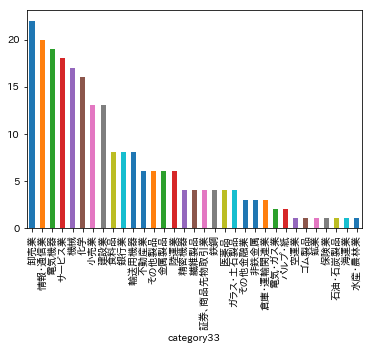

In [7]:
companies.groupby(["category33"]).count()["edi_id"].sort_values(ascending=False).plot(kind="bar")

In [8]:
print("The number of sentences are {}.".format(len(sentences)))
print("The sentences that have entities are {}.".format(len(sentences[sentences["entities"] > 0])))

The number of sentences are 6119.
The sentences that have entities are 3215.


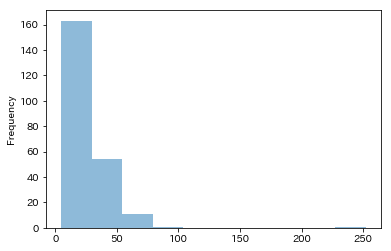

In [9]:
sentences.groupby(["company"]).count()["sentence"].plot.hist(alpha=0.5)

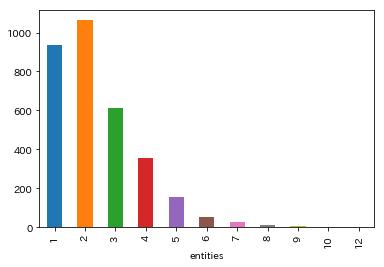

In [10]:
sentences[sentences["entities"] > 0].groupby(["entities"]).count()["company"].plot.bar()

In [11]:
print("{} entities are annotated.".format(len(entities)))

7723 entities are annotated.


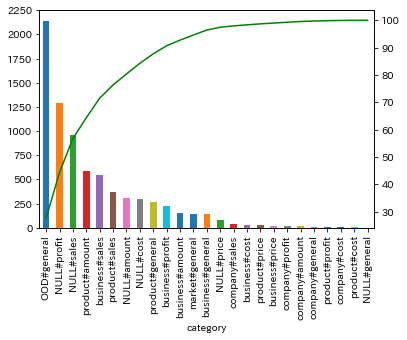

In [12]:
entities.groupby(["category"]).count()["target"].sort_values(ascending=False).plot(kind="bar")
(entities.groupby(["category"]).count()["target"].sort_values(ascending=False).cumsum() * 100 / len(entities)).plot.line(secondary_y=True, style="g", rot=90)

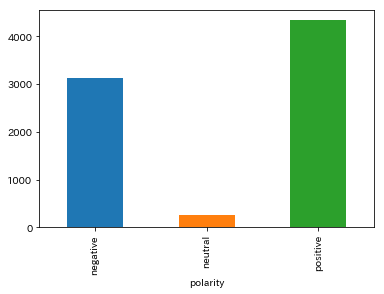

In [13]:
entities.groupby(["polarity"]).count()["target"].plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1102ed7b8>,
      dtype=object)

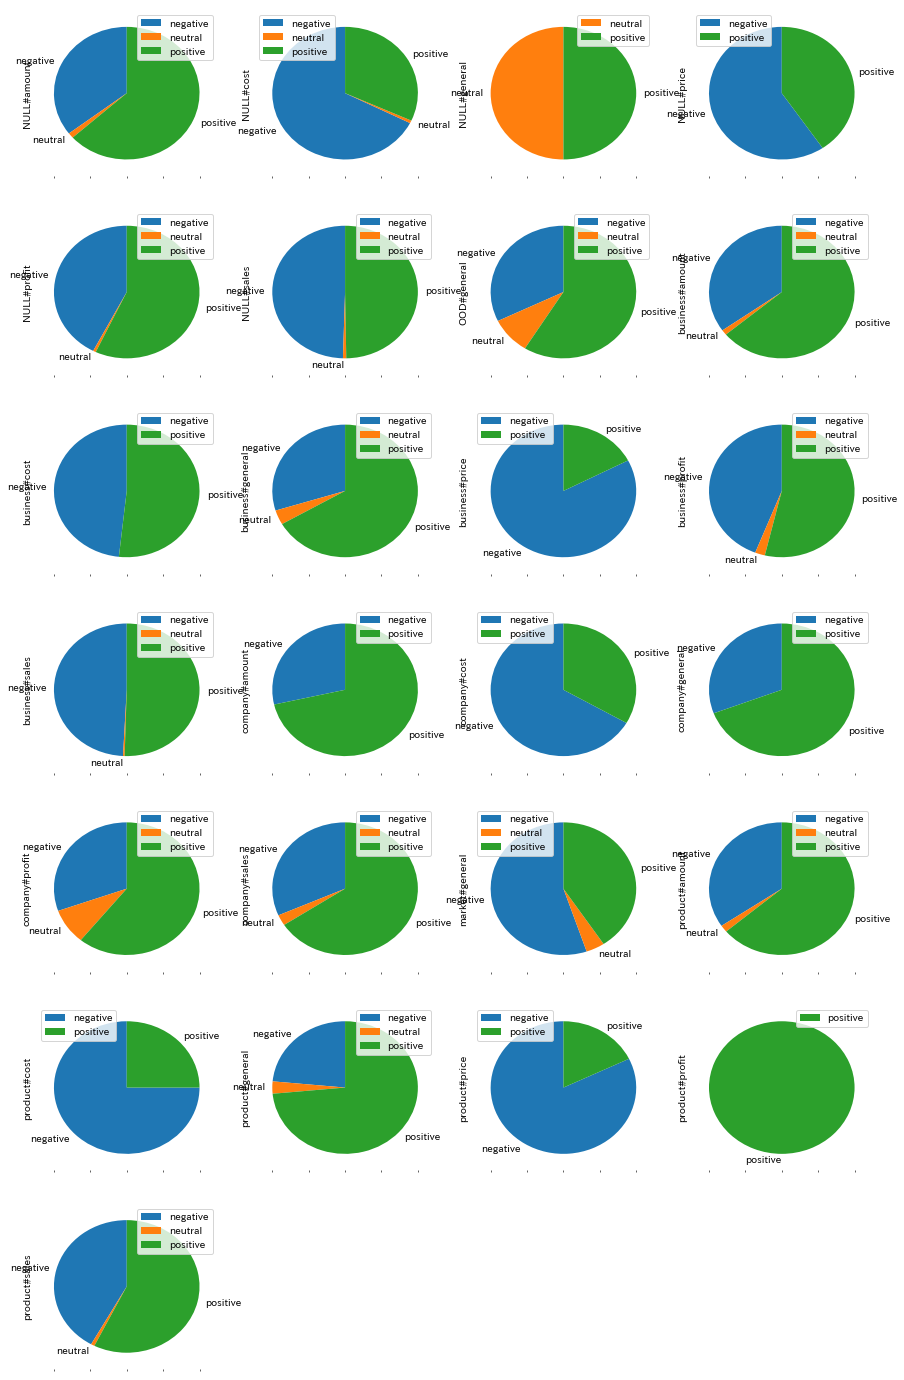

In [97]:
entities.groupby(["category", "polarity"]).count()["target"].unstack("category").plot.pie(subplots=True, layout=(7, 4), figsize=(15, 25), startangle=90)